In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
# Instantiate the KMEans model with 3 clusters
kmeans = KMeans(n_clusters=3)

In [14]:
# fit the model to the data
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
# predict the cluster labels for the dataset
labels = kmeans.predict(data)

In [17]:
# Add the cluster labels to the DataFrame for easy reference
data['clusters'] = labels

In [21]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


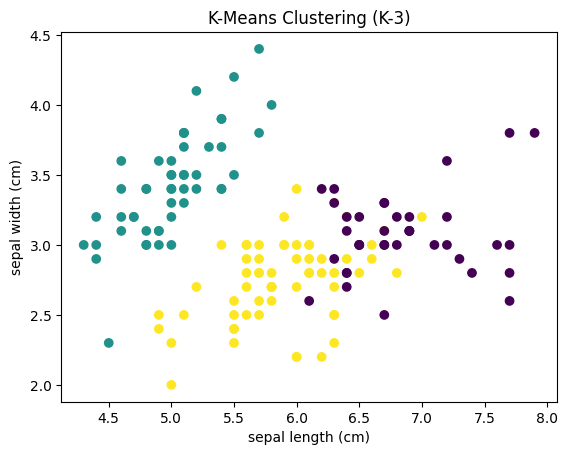

In [23]:
# plot the  clusters using the first two features

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering (K-3)")
plt.show()

Great observation! Let's dive into the **Iris dataset** to better understand what the features represent and how the clustering reflects the data structure.

---

### **Understanding the Iris Dataset**

The **Iris dataset** is one of the most famous datasets used in machine learning, especially for classification and clustering. It contains **150 samples** of iris flowers, and each sample has **four features** that describe the flowers' characteristics. These features are:

1. **Sepal length (cm)**: The length of the outermost part of the flower (sepal).
2. **Sepal width (cm)**: The width of the sepal.
3. **Petal length (cm)**: The length of the inner part of the flower (petal).
4. **Petal width (cm)**: The width of the petal.

The dataset also contains labels for three species of iris flowers (which we won’t use directly since we’re doing unsupervised learning):
- **Setosa**
- **Versicolor**
- **Virginica**

However, when you cluster the data, the model is **blind** to these species labels—it just looks at the features to group the flowers based on similarity.

---

### **What Does the Clustering Represent?**

- **Three clusters**: Since you set `K=3` in K-Means, it grouped the data into three clusters. Each cluster represents a group of data points (flowers) that are more similar to each other based on their sepal and petal dimensions.
  
- **One isolated cluster**: The clear separation of one cluster from the others indicates that one of the species (likely **Setosa**) is **very distinct** in terms of its sepal and petal measurements compared to the other two species.

- **Overlapping clusters**: The slight overlap between the other two clusters suggests that the **Versicolor** and **Virginica** species have some similarities in their features (especially petal length/width), making it harder to completely separate them.

---

### **Feature Significance in Clustering**
In this plot, we only used the **first two features** (sepal length and sepal width) for visualization. This explains why the clusters may overlap slightly—using more features (e.g., petal length and width) might give a clearer separation between the clusters.

---

### **Next Steps**: Understanding Feature Importance
Before moving forward with the elbow method, let’s take a moment to inspect **how each feature contributes to clustering** by plotting pairwise relationships between all features.


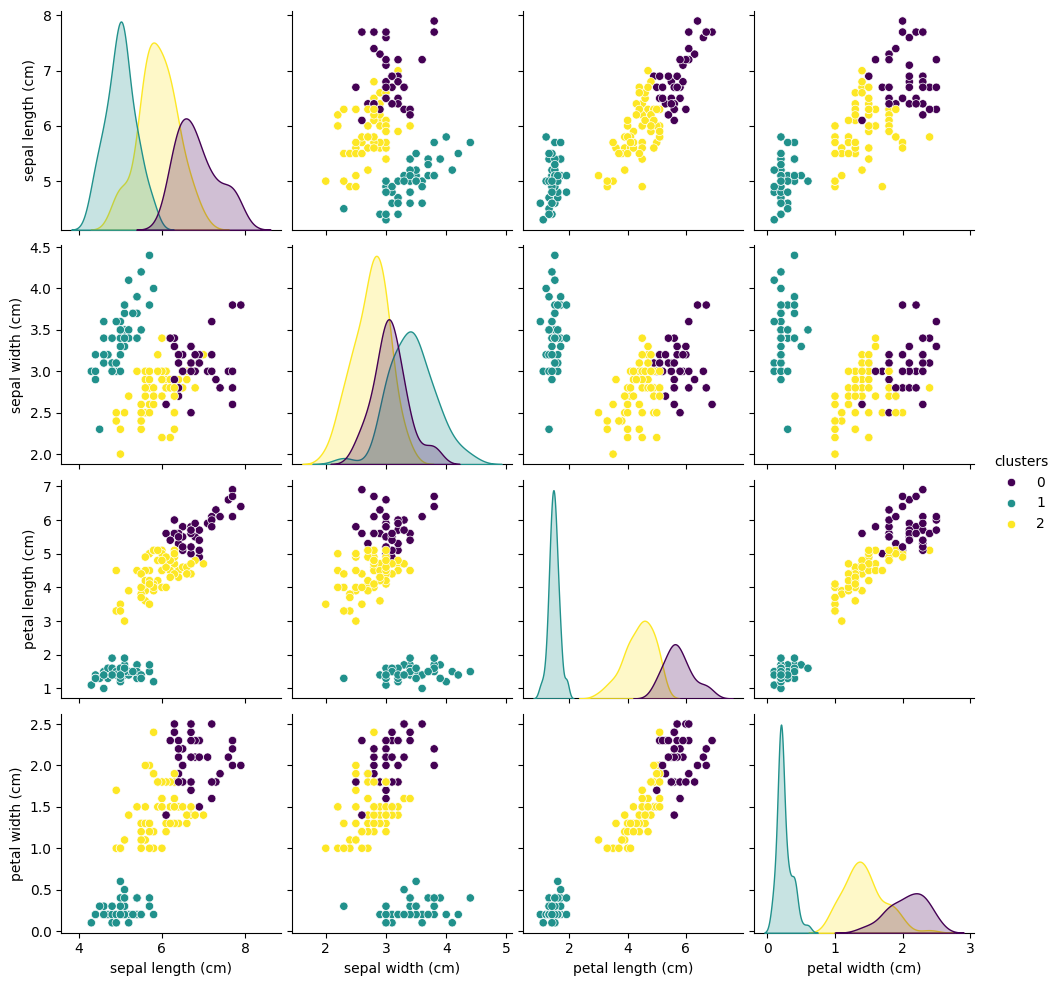

In [27]:
import seaborn as sns

# Create a pairplot to visualize relationships between all features
sns.pairplot(data, hue='clusters', diag_kind='kde', palette='viridis')
plt.show()


Awesome! Glad it's working now! Let’s dive further into the **clustering process** and make sure you can interpret the results with confidence.

---

### **Step 3: Choosing the Optimal Number of Clusters (Elbow Method)**

Now that we’ve clustered the data into 3 clusters, let’s address a key question: **How do you choose the right number of clusters (`K`)?**

#### **Why is this important?**
Choosing too few clusters may oversimplify the data, while too many clusters may overfit and create unnecessary complexity.

---

### **The Elbow Method**

The **Elbow Method** helps you determine the optimal number of clusters by looking at the **inertia** (sum of squared distances from each point to its assigned cluster center).

- **Inertia** decreases as the number of clusters increases, but beyond a certain point, the improvement is minimal. This point is called the "elbow."

#### **Steps to Implement**:

1. For different values of `K`, calculate the **inertia** (how compact the clusters are).
2. Plot the inertia against the number of clusters.
3. Look for the "elbow" in the plot—this will help you decide the best `K`.

Here’s how you can implement this:

```python
# Calculate inertia for different values of K
sse = []  # Sum of squared distances to cluster centers

# Loop over different values of K
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data.drop(columns=['Cluster']))  # Drop the 'Cluster' column if already present
    sse.append(kmeans.inertia_)  # Append the inertia value for each K

# Plotting the Elbow graph
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method to Find Optimal K')
plt.show()
```

### **Task**:
1. **Run the code** to generate the Elbow plot.
2. **Interpret the graph**: Look for the point where the inertia stops decreasing significantly (the "elbow"). This is usually the best choice for `K`.

---

### **Next Step: Interpreting the Elbow**
Once you’ve identified the optimal `K`, let me know your observation, and we’ll move on to exploring more clustering techniques!



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

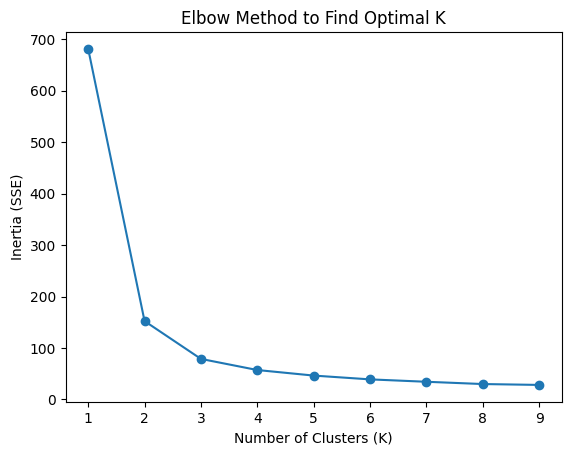

In [33]:
# Calculate inertia for different values of K
sse = []  # Sum of squared distances to cluster centers

# Loop over different values of K
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data.drop(columns=['clusters']))  # Drop the 'Cluster' column if already present
    sse.append(kmeans.inertia_)  # Append the inertia value for each K

# Plotting the Elbow graph
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method to Find Optimal K')
plt.show()

### **What does this graph signify?**
- The y-axis shows the **inertia** (how tight the clusters are), and the x-axis shows the **number of clusters (K)**.
- As `K` increases, inertia naturally decreases because more clusters lead to tighter groupings.
- However, at some point, increasing the number of clusters leads to diminishing returns—**this is the "elbow" point**, which represents the optimal number of clusters.

### **Interpreting Your Graph**:
- The plot shows a **sharp drop** in inertia from K=1 to K=3.
- After **K=3**, the inertia starts decreasing more slowly. This suggests that the best number of clusters for this dataset is **K=3**.
  
  The "elbow" is at **K=3**, indicating that after this point, adding more clusters doesn't significantly improve the compactness of the clusters.

### **Conclusion**:
- **K=3** is the optimal number of clusters for your Iris dataset. This aligns with our prior knowledge that there are three types of iris flowers in the dataset (**Setosa**, **Versicolor**, and **Virginica**).

---


Great! Let's take an **application-based approach** using the K-Means clustering results we already have. I’ll guide you through **how clustering can be applied** to extract insights and solve real-world problems.

### **What Can You Do with K-Means Clustering?**

Clustering, especially in unsupervised learning, is often used for **exploratory data analysis** to discover patterns or segment the data. Here are practical ways you can use clustering:

---

### **1. Customer Segmentation**
**Scenario**: Imagine instead of iris flowers, you’re working with a customer database for an e-commerce platform. Each customer has different characteristics like age, spending habits, website interaction metrics, etc.

- **Clustering Outcome**: You could use K-Means clustering to group customers into distinct segments (e.g., high spenders, occasional buyers, window shoppers).
- **Actionable Insight**: Once the clusters are identified, you can tailor marketing strategies to each group. High spenders could receive premium offers, while occasional buyers might get promotions to increase engagement.

### **2. Anomaly Detection (Outliers)**
**Scenario**: Suppose you have an IoT sensor dataset that monitors various machines in a factory. Each machine's data can be clustered based on sensor readings like temperature, vibration, and power consumption.

- **Clustering Outcome**: K-Means would group the machines that operate similarly. If a machine operates significantly different from its cluster, it could be an **anomaly**.
- **Actionable Insight**: You can monitor these outliers for potential machine failures, triggering maintenance alerts before a breakdown.

### **3. Image Segmentation**
**Scenario**: In computer vision tasks, K-Means is often used for **image segmentation**, where an image is divided into different regions based on pixel similarities.

- **Clustering Outcome**: In an image of a scene, K-Means can cluster similar pixels together, grouping objects of similar colors, textures, or brightness.
- **Actionable Insight**: You can apply this for object detection, medical imaging (tumor segmentation), or background removal in photos.

### **4. Market Basket Analysis**
**Scenario**: Suppose you're analyzing product data for a retail store. Each product has features like price, category, sales volume, and so on.

- **Clustering Outcome**: You can use clustering to group products with similar purchasing patterns (e.g., high-price, high-sales vs. low-price, high-sales).
- **Actionable Insight**: By segmenting products, you can optimize inventory management, pricing strategies, or shelf placement to maximize sales for each group.

---

### **Let's Apply This to the Iris Dataset**

Since we’re working with the **Iris dataset**, let’s extract insights from our clusters.

#### **Application 1: Analyzing Flower Groups (Species Segmentation)**

Now that we’ve clustered the flowers into 3 groups, let’s analyze the clusters to see how different they are. The goal is to understand the **characteristics** of each cluster based on sepal and petal measurements.

### **Task: Analyze Cluster Characteristics**

1. **Calculate the Mean of Each Feature per Cluster**:
   This will give you insights into the average sepal/petal measurements for each group of flowers (clusters).

```python
# Group the data by clusters and calculate the mean of each feature
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)
```

2. **Interpret the Output**:
   - Look at how the average values of **sepal length, sepal width, petal length, and petal width** differ between the clusters.
   - Try to see if the clusters correspond to specific species (though this is unsupervised, you can still compare the clusters to known species).

---

### **Application 2: Predicting for New Data Points**

Once you have trained a K-Means model, you can use it to predict which cluster **new data points** belong to.

#### **Task: Predict Cluster for New Data Points**
Let’s say you receive new flower measurements and want to assign them to a cluster:

```python
# Example new data point (sepal length, sepal width, petal length, petal width)
new_data = [[5.0, 3.5, 1.5, 0.2]]  # Replace with any new data point

# Predict the cluster for the new data
predicted_cluster = kmeans.predict(new_data)
print(f"The new data point belongs to cluster: {predicted_cluster[0]}")
```

### **Insight**:
- You can use this to classify new data points (flowers in this case) into one of the existing clusters based on similarity to previously seen data.

---

### **Your Task**:
1. **Run the cluster analysis** (means per cluster) and look at the differences in feature values.
2. **Try predicting** the cluster for a new flower measurement.
3. Share your observations, and I'll help interpret them or take you further into more applications!

Let me know how it goes! 😊

In [35]:
# Making the model
# Example new data point (sepal length, sepal width, petal length, petal width)
new_data = [[5.0, 3.5, 1.5, 0.2]]  # Replace with any new data point

# Predict the cluster for the new data

predicted_cluster = kmeans.predict(new_data)
print(f"The new data point belongs to cluster: {predicted_cluster[0]}")


The new data point belongs to cluster: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
